In [61]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict

In [62]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    four:int
    sixes:int

    sr:float
    bpb:float
    boundry_percentage:float
    summary :str
    


In [63]:
def calculate_SR(state:BatsmanState)->BatsmanState:
    runs = state['runs']
    balls = state['balls']
    four = state['four']
    sixes = state['sixes']
    sr =  (runs/balls)*100
    # state['sr'] = sr
    return {'sr' :sr}

In [64]:
def calculate_BPB(state:BatsmanState)->BatsmanState:
    runs = state['runs']
    balls = state['balls']
    four = state['four']
    sixes = state['sixes']

    bpb = (balls)/(four+sixes)
    # state['bpb'] = bpb
    return {'bpb' : bpb}

In [65]:
def calculate_boundryPercentage(state:BatsmanState)->BatsmanState:
    runs = state['runs']
    balls = state['balls']
    four = state['four']
    sixes = state['sixes']

    boundry = (((four)*4  + (sixes)* 6)/runs)*100
    # state['boundry_percentage'] = boundry
    return {'boundry_percentage':boundry}

In [66]:
def Summary(state:BatsmanState)->BatsmanState:

    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percent - {state['boundry_percentage']}
    """
    # state['summary'] = summary
    return {'summary':summary}

In [67]:
graph = StateGraph(BatsmanState)
#add node 
graph.add_node('calculate_sr',calculate_SR)
graph.add_node('calculate_bpb',calculate_BPB)
graph.add_node('calculate_boundryPercentage',calculate_boundryPercentage)
graph.add_node('summary',Summary)


In [68]:
# edges 
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_boundryPercentage")

graph.add_edge("calculate_sr",'summary')
graph.add_edge("calculate_bpb",'summary')
graph.add_edge("calculate_boundryPercentage",'summary')


graph.add_edge("summary",END)


workflow = graph.compile()

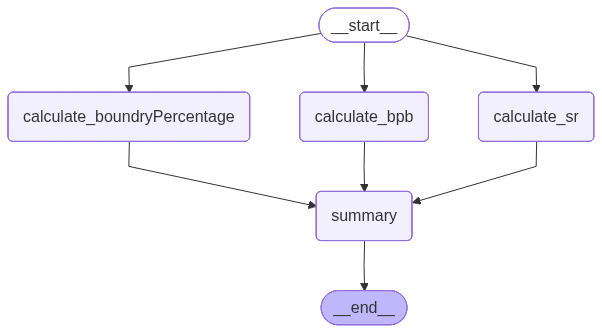

In [69]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [70]:
initial_state = {"runs":100,"balls":50,"four":6,"sixes":4 }

final_State = workflow.invoke(initial_state)

print(final_State)

{'runs': 100, 'balls': 50, 'four': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundry_percentage': 48.0, 'summary': '\n    Strike Rate - 200.0 \n\n    Balls per boundary - 5.0 \n\n    Boundary percent - 48.0\n    '}
